<a href="https://colab.research.google.com/github/yuki86/robotica/blob/master/perception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Criação de amostras A e B:

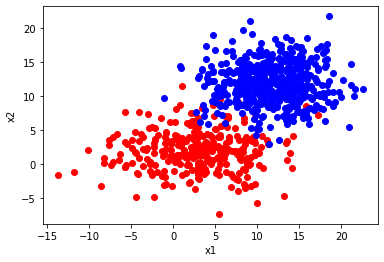

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import csv

x1_range = np.linspace(-40,40,200)

Ax1 = np.random.normal(3, 5, 300)
Ax2 = np.random.normal(2, 3, 300)

Bx1 = np.random.normal(12, 4, 500)
Bx2 = np.random.normal(12, 3, 500)

plt.plot(Ax1, Ax2,'ro',color = "red")
plt.plot(Bx1, Bx2,'ro',color = "blue")
plt.xlabel('x1')
plt.ylabel('x2')

f = open('amostraA.csv', 'w', newline='')
with f:
  writer = csv.writer(f)
  for index in range( 0, len( Ax1)):
      row = str(Ax1[index]), str( Ax2[index])
      writer.writerow( row )

f = open('amostraB.csv', 'w', newline='')
with f:
    writer = csv.writer(f)
    for index in range( 0, len( Bx1)) :
      row = str(Bx1[index]), str(Bx2[index])
      writer.writerow( row )

Determinação dos parâmetros a e b manualmente:

-1.0   15.0   13   21   34
Fim



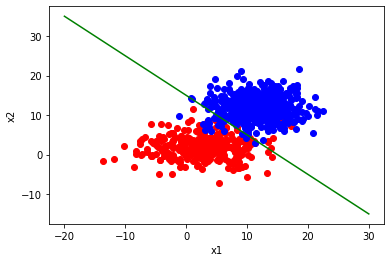

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import csv

x1_range = np.linspace(-20,30,100)

f = open('amostraB.csv', 'r')
with f:
  reader = csv.reader(f, delimiter=",")
  rowsA = len(list(reader))

f = open('amostraA.csv', 'r')
with f:
  reader = csv.reader(f, delimiter=",")
  Ax1 = np.zeros(rowsA)
  Ax2 = np.zeros(rowsA)
  cont = 0
  for row in reader:
    Ax1[cont] = row[0]
    Ax2[cont] = row[1]
    cont = cont + 1

f = open('amostraB.csv', 'r')
with f:
  reader = csv.reader(f, delimiter=",")
  rowsB = len(list(reader))

f = open('amostraB.csv', 'r')
with f:
  reader = csv.reader(f, delimiter=",")
  Bx1 = np.zeros(rowsA)
  Bx2 = np.zeros(rowsA)
  cont = 0
  for row in reader:
    Bx1[cont] = row[0]
    Bx2[cont] = row[1]
    cont = cont + 1

plt.plot(Ax1, Ax2,'ro',color = "red")
plt.plot(Bx1, Bx2,'ro',color = "blue")
plt.xlabel('x1')
plt.ylabel('x2')

a= -1.0
b = 15.0

contErrA = 0
for index in range(0, len(Ax1)):
  if (Ax2[index] > (Ax1[index]*a + b) ):
    contErrA = contErrA + 1

contErrB = 0
for index in range(0, len(Bx1)):
  if (Bx2[index] < (Bx1[index]*a + b) ):
    contErrB = contErrB + 1

err_Total = contErrA + contErrB
print(a, " ",b," ", contErrA," ",contErrB," ",err_Total,end="\n")
plt.plot(x1_range, a*x1_range + b, '-g')

print ("Fim\n")